In [32]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties

# 獲取當前工作目錄
# 獲取當前工作目錄
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
version3_path = os.path.join(parent_dir, "Version3")

# 暫時將工作目錄切換到 Version3
os.chdir(version3_path)

from utils.model_score import *
import seaborn as sns
from matplotlib.font_manager import FontProperties
import pickle

try:
    myfont = FontProperties(fname=r"/System/Library/Fonts/PingFang.ttc")
    sns.set(style="whitegrid", font=myfont.get_name())
except Exception as e:
    print(e)
    
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

[Errno 2] No such file or directory: 'C:\\System\\Library\\Fonts\\PingFang.ttc'


In [33]:
logistic_file_paths = [
    "../Models/ModelPerformanceNofold/logistic/pass_out_overlap.pkl",
    "../Models/ModelPerformanceNofold/logistic/pass_0.pkl",
    "../Models/ModelPerformanceNofold/logistic/pass_1.pkl",
    "../Models/ModelPerformanceNofold/logistic/car_out_overlap.pkl",
    "../Models/ModelPerformanceNofold/logistic/car_0.pkl",
    "../Models/ModelPerformanceNofold/logistic/car_1.pkl",
    "../Models/ModelPerformanceNofold/logistic/car_2.pkl",
    "../Models/ModelPerformanceNofold/logistic/motor_out_overlap.pkl",
    "../Models/ModelPerformanceNofold/logistic/motor_0.pkl",
    "../Models/ModelPerformanceNofold/logistic/motor_1.pkl",
    "../Models/ModelPerformanceNofold/logistic/full_data.pkl"
]

svc_file_paths = [
    "../Models/ModelPerformanceNofold/svc/pass_out_overlap.pkl",
    "../Models/ModelPerformanceNofold/svc/pass_0.pkl",
    "../Models/ModelPerformanceNofold/svc/pass_1.pkl",
    "../Models/ModelPerformanceNofold/svc/car_out_overlap.pkl",
    "../Models/ModelPerformanceNofold/svc/car_0.pkl",
    "../Models/ModelPerformanceNofold/svc/car_1.pkl",
    "../Models/ModelPerformanceNofold/svc/car_2.pkl",
    "../Models/ModelPerformanceNofold/svc/motor_out_overlap.pkl",
    "../Models/ModelPerformanceNofold/svc/motor_0.pkl",
    "../Models/ModelPerformanceNofold/svc/motor_1.pkl",
    "../Models/ModelPerformanceNofold/svc/full_data.pkl"
]

xgboost_file_paths = [
    "../Models/ModelPerformanceNofold/xgboost/pass_out_overlap.pkl",
    "../Models/ModelPerformanceNofold/xgboost/pass_0.pkl",
    "../Models/ModelPerformanceNofold/xgboost/pass_1.pkl",
    "../Models/ModelPerformanceNofold/xgboost/car_out_overlap.pkl",
    "../Models/ModelPerformanceNofold/xgboost/car_0.pkl",
    "../Models/ModelPerformanceNofold/xgboost/car_1.pkl",
    "../Models/ModelPerformanceNofold/xgboost/car_2.pkl",
    "../Models/ModelPerformanceNofold/xgboost/motor_out_overlap.pkl",
    "../Models/ModelPerformanceNofold/xgboost/motor_0.pkl",
    "../Models/ModelPerformanceNofold/xgboost/motor_1.pkl",
    "../Models/ModelPerformanceNofold/xgboost/full_data.pkl"
]

variable_names = [
    "pass_out_overlap", "pass_0", "pass_1",
    "car_out_overlap", "car_0", "car_1", "car_2",
    "motor_out_overlap", "motor_0", "motor_1",
    "full_data"
]

# Function to load pickle files
def load_pickle_files(file_paths, variable_names):
    data = {}
    for file_path, var_name in zip(file_paths, variable_names):
        with open(file_path, "rb") as f:
            data[var_name] = pickle.load(f)
    return data

## 大類別

In [34]:
# Load logistic and svc models
logistic_data = load_pickle_files(logistic_file_paths, variable_names)
svc_data = load_pickle_files(svc_file_paths, variable_names)
xgb_data = load_pickle_files(xgboost_file_paths, variable_names)

# Process logistic data
poo_mtrx, poo_recall, poo_precision, poo_f1, poo_acc, poo_class, poo_threshold = get_score(logistic_data['pass_out_overlap']['y'], logistic_data['pass_out_overlap']['decision_scores'])
p0_mtrx, p0_recall, p0_precision, p0_f1, p0_acc, p0_class, p0_threshold = get_score(logistic_data['pass_0']['y'], logistic_data['pass_0']['decision_scores'])
p1_mtrx, p1_recall, p1_precision, p1_f1, p1_acc, p1_class, p1_threshold = get_score(logistic_data['pass_1']['y'], logistic_data['pass_1']['decision_scores'])
p_mtrx = poo_mtrx + p0_mtrx + p1_mtrx

moo_mtrx, moo_recall, moo_precision, moo_f1, moo_acc, moo_class, moo_threshold = get_score(logistic_data['motor_out_overlap']['y'], logistic_data['motor_out_overlap']['decision_scores'])
m0_mtrx, m0_recall, m0_precision, m0_f1, m0_acc, m0_class, m0_threshold = get_score(logistic_data['motor_0']['y'], logistic_data['motor_0']['decision_scores'])
m1_mtrx, m1_recall, m1_precision, m1_f1, m1_acc, m1_class, m1_threshold = get_score(logistic_data['motor_1']['y'], logistic_data['motor_1']['decision_scores'])
m_mtrx = moo_mtrx + m0_mtrx + m1_mtrx

coo_mtrx, coo_recall, coo_precision, coo_f1, coo_acc, coo_class, coo_threshold = get_score(logistic_data['car_out_overlap']['y'], logistic_data['car_out_overlap']['decision_scores'])
c0_mtrx, c0_recall, c0_precision, c0_f1, c0_acc, c0_class, c0_threshold = get_score(logistic_data['car_0']['y'], logistic_data['car_0']['decision_scores'])
c1_mtrx, c1_recall, c1_precision, c1_f1, c1_acc, c1_class, c1_threshold = get_score(logistic_data['car_1']['y'], logistic_data['car_1']['decision_scores'])
c2_mtrx, c2_recall, c2_precision, c2_f1, c2_acc, c2_class, c2_threshold = get_score(logistic_data['car_2']['y'], logistic_data['car_2']['decision_scores'])
c_mtrx = coo_mtrx + c0_mtrx + c1_mtrx + c2_mtrx

tp_mtrx = p_mtrx + m_mtrx + c_mtrx
tp_recall, tp_precision, tp_f1, tp_acc = calculate_recall_precision(tp_mtrx)

fd_mtrx, fd_recall, fd_precision, fd_f1, fd_acc, fd_class, fd_threshold = get_score(logistic_data['full_data']['y'], logistic_data['full_data']['decision_scores'])

# Process svc data
poo_mtrx_svc, poo_recall_svc, poo_precision_svc, poo_f1_svc, poo_acc_svc, poo_class_svc, poo_threshold_svc = get_score(svc_data['pass_out_overlap']['y'], svc_data['pass_out_overlap']['decision_scores'])
p0_mtrx_svc, p0_recall_svc, p0_precision_svc, p0_f1_svc, p0_acc_svc, p0_class_svc, p0_threshold_svc = get_score(svc_data['pass_0']['y'], svc_data['pass_0']['decision_scores'])
p1_mtrx_svc, p1_recall_svc, p1_precision_svc, p1_f1_svc, p1_acc_svc, p1_class_svc, p1_threshold_svc = get_score(svc_data['pass_1']['y'], svc_data['pass_1']['decision_scores'])
p_mtrx_svc = poo_mtrx_svc + p0_mtrx_svc + p1_mtrx_svc

moo_mtrx_svc, moo_recall_svc, moo_precision_svc, moo_f1_svc, moo_acc_svc, moo_class_svc, moo_threshold_svc = get_score(svc_data['motor_out_overlap']['y'], svc_data['motor_out_overlap']['decision_scores'])
m0_mtrx_svc, m0_recall_svc, m0_precision_svc, m0_f1_svc, m0_acc_svc, m0_class_svc, m0_threshold_svc = get_score(svc_data['motor_0']['y'], svc_data['motor_0']['decision_scores'])
m1_mtrx_svc, m1_recall_svc, m1_precision_svc, m1_f1_svc, m1_acc_svc, m1_class_svc, m1_threshold_svc = get_score(svc_data['motor_1']['y'], svc_data['motor_1']['decision_scores'])
m_mtrx_svc = moo_mtrx_svc + m0_mtrx_svc + m1_mtrx_svc

coo_mtrx_svc, coo_recall_svc, coo_precision_svc, coo_f1_svc, coo_acc_svc, coo_class_svc, coo_threshold_svc = get_score(svc_data['car_out_overlap']['y'], svc_data['car_out_overlap']['decision_scores'])
c0_mtrx_svc, c0_recall_svc, c0_precision_svc, c0_f1_svc, c0_acc_svc, c0_class_svc, c0_threshold_svc = get_score(svc_data['car_0']['y'], svc_data['car_0']['decision_scores'])
c1_mtrx_svc, c1_recall_svc, c1_precision_svc, c1_f1_svc, c1_acc_svc, c1_class_svc, c1_threshold_svc = get_score(svc_data['car_1']['y'], svc_data['car_1']['decision_scores'])
c2_mtrx_svc, c2_recall_svc, c2_precision_svc, c2_f1_svc, c2_acc_svc, c2_class_svc, c2_threshold_svc = get_score(svc_data['car_2']['y'], svc_data['car_2']['decision_scores'])
c_mtrx_svc = coo_mtrx_svc + c0_mtrx_svc + c1_mtrx_svc + c2_mtrx_svc

tp_mtrx_svc = p_mtrx_svc + m_mtrx_svc + c_mtrx_svc
tp_recall_svc, tp_precision_svc, tp_f1_svc, tp_acc_svc = calculate_recall_precision(tp_mtrx_svc)

fd_mtrx_svc, fd_recall_svc, fd_precision_svc, fd_f1_svc, fd_acc_svc, fd_class_svc, fd_threshold_svc = get_score(svc_data['full_data']['y'], svc_data['full_data']['decision_scores'])

# Process xgboost data
poo_mtrx_xgb, poo_recall_xgb, poo_precision_xgb, poo_f1_xgb, poo_acc_xgb, poo_class_xgb, poo_threshold_xgb = get_score(xgb_data['pass_out_overlap']['y'], xgb_data['pass_out_overlap']['decision_scores'])
p0_mtrx_xgb, p0_recall_xgb, p0_precision_xgb, p0_f1_xgb, p0_acc_xgb, p0_class_xgb, p0_threshold_xgb = get_score(xgb_data['pass_0']['y'], xgb_data['pass_0']['decision_scores'])
p1_mtrx_xgb, p1_recall_xgb, p1_precision_xgb, p1_f1_xgb, p1_acc_xgb, p1_class_xgb, p1_threshold_xgb = get_score(xgb_data['pass_1']['y'], xgb_data['pass_1']['decision_scores'])
p_mtrx_xgb = poo_mtrx_xgb + p0_mtrx_xgb + p1_mtrx_xgb

moo_mtrx_xgb, moo_recall_xgb, moo_precision_xgb, moo_f1_xgb, moo_acc_xgb, moo_class_xgb, moo_threshold_xgb = get_score(xgb_data['motor_out_overlap']['y'], xgb_data['motor_out_overlap']['decision_scores'])
m0_mtrx_xgb, m0_recall_xgb, m0_precision_xgb, m0_f1_xgb, m0_acc_xgb, m0_class_xgb, m0_threshold_xgb = get_score(xgb_data['motor_0']['y'], xgb_data['motor_0']['decision_scores'])
m1_mtrx_xgb, m1_recall_xgb, m1_precision_xgb, m1_f1_xgb, m1_acc_xgb, m1_class_xgb, m1_threshold_xgb = get_score(xgb_data['motor_1']['y'], xgb_data['motor_1']['decision_scores'])
m_mtrx_xgb = moo_mtrx_xgb + m0_mtrx_xgb + m1_mtrx_xgb

coo_mtrx_xgb, coo_recall_xgb, coo_precision_xgb, coo_f1_xgb, coo_acc_xgb, coo_class_xgb, coo_threshold_xgb = get_score(xgb_data['car_out_overlap']['y'], xgb_data['car_out_overlap']['decision_scores'])
c0_mtrx_xgb, c0_recall_xgb, c0_precision_xgb, c0_f1_xgb, c0_acc_xgb, c0_class_xgb, c0_threshold_xgb = get_score(xgb_data['car_0']['y'], xgb_data['car_0']['decision_scores'])
c1_mtrx_xgb, c1_recall_xgb, c1_precision_xgb, c1_f1_xgb, c1_acc_xgb, c1_class_xgb, c1_threshold_xgb = get_score(xgb_data['car_1']['y'], xgb_data['car_1']['decision_scores'])
c2_mtrx_xgb, c2_recall_xgb, c2_precision_xgb, c2_f1_xgb, c2_acc_xgb, c2_class_xgb, c2_threshold_xgb = get_score(xgb_data['car_2']['y'], xgb_data['car_2']['decision_scores'])
c_mtrx_xgb = coo_mtrx_xgb + c0_mtrx_xgb + c1_mtrx_xgb + c2_mtrx_xgb

tp_mtrx_xgb = p_mtrx_xgb + m_mtrx_xgb + c_mtrx_xgb
tp_recall_xgb, tp_precision_xgb, tp_f1_xgb, tp_acc_xgb = calculate_recall_precision(tp_mtrx_xgb)

fd_mtrx_xgb, fd_recall_xgb, fd_precision_xgb, fd_f1_xgb, fd_acc_xgb, fd_class_xgb, fd_threshold_xgb = get_score(xgb_data['full_data']['y'], xgb_data['full_data']['decision_scores'])

In [35]:
print('passenger logistic')
print(poo_recall, poo_precision)
print(p0_recall, p0_precision)
print(p1_recall, p1_precision)
print('motor logistic')
print(moo_recall, moo_precision)
print(m0_recall, m0_precision)
print(m1_recall, m1_precision)
print('car logistic')
print(coo_recall, coo_precision)
print(c0_recall, c0_precision)
print(c1_recall, c1_precision)
print(c2_recall, c2_precision)
print('passenger svc')
print(poo_recall_svc, poo_precision_svc)
print(p0_recall_svc, p0_precision_svc)
print(p1_recall_svc, p1_precision_svc)
print('motor svc')
print(moo_recall_svc, moo_precision_svc)
print(m0_recall_svc, m0_precision_svc)
print(m1_recall_svc, m1_precision_svc)
print('car svc')
print(coo_recall_svc, coo_precision_svc)
print(c0_recall_svc, c0_precision_svc)
print(c1_recall_svc, c1_precision_svc)
print(c2_recall_svc, c2_precision_svc)
print('passenger xgboost')
print(poo_recall_xgb, poo_precision_xgb)
print(p0_recall_xgb, p0_precision_xgb)
print(p1_recall_xgb, p1_precision_xgb)
print('motor xgboost')
print(moo_recall_xgb, moo_precision_xgb)
print(m0_recall_xgb, m0_precision_xgb)
print(m1_recall_xgb, m1_precision_xgb)
print('car xgboost')
print(coo_recall_xgb, coo_precision_xgb)
print(c0_recall_xgb, c0_precision_xgb)
print(c1_recall_xgb, c1_precision_xgb)
print(c2_recall_xgb, c2_precision_xgb)

passenger logistic
0.5 1.0
1.0 0.6666666666666666
0.8571428571428571 0.75
motor logistic
0.8333333333333334 0.8333333333333334
0.6595744680851063 0.7294117647058823
0.45454545454545453 0.9090909090909091
car logistic
0.2692307692307692 0.875
0.5476190476190477 0.7076923076923077
0.7115384615384616 0.8409090909090909
0.7777777777777778 0.7
passenger svc
0.75 1.0
0.75 0.75
0.5714285714285714 1.0
motor svc
0.8333333333333334 0.8333333333333334
0.6063829787234043 0.7402597402597403
0.6363636363636364 0.7777777777777778
car svc
0.3076923076923077 0.8888888888888888
0.5595238095238095 0.7014925373134329
0.75 0.7959183673469388
0.7777777777777778 0.7
passenger xgboost
1.0 0.8
0.75 1.0
0.42857142857142855 1.0
motor xgboost
1.0 0.75
0.723404255319149 0.6868686868686869
0.6818181818181818 0.8333333333333334
car xgboost
0.6153846153846154 0.8
0.6309523809523809 0.6973684210526315
0.7307692307692307 0.7307692307692307
0.5555555555555556 0.8333333333333334


In [36]:
print('full logistic')
print(fd_recall, fd_precision)
print('topology logistic')
print(tp_recall, tp_precision)
print('full svc')
print(fd_recall_svc, fd_precision_svc)
print('topology svc')
print(tp_recall_svc, tp_precision_svc)
print('full xgboost')
print(fd_recall_xgb, fd_precision_xgb)
print('topology xgboost')
print(tp_recall_xgb, tp_precision_xgb)

full logistic
0.5481727574750831 0.7534246575342466
topology logistic
0.6038961038961039 0.7591836734693878
full svc
0.5448504983388704 0.7557603686635944
topology svc
0.6071428571428571 0.757085020242915
full xgboost
0.5581395348837209 0.6412213740458015
topology xgboost
0.685064935064935 0.7275862068965517


## 準確率

In [37]:
data = {
    "Model": labels,
    "Recall": recall,
    "Precision": precision,
    "Accuracy": acc,
    "F1 Score": f1
}
df = pd.DataFrame(data)
df

,Model,Recall,Precision,Accuracy,F1 Score
0,Logistic Origin,0.581818,0.666667,0.645455,0.621359
1,Logistic Topology,0.603896,0.759184,0.706169,0.672694
2,SVC Origin,0.715152,0.621053,0.639394,0.664789
3,SVC Topology,0.607143,0.757085,0.706169,0.673874
4,XGBoost Origin,0.558140,0.641221,0.622924,0.596803
5,XGBoost Topology,0.685065,0.727586,0.714286,0.705686


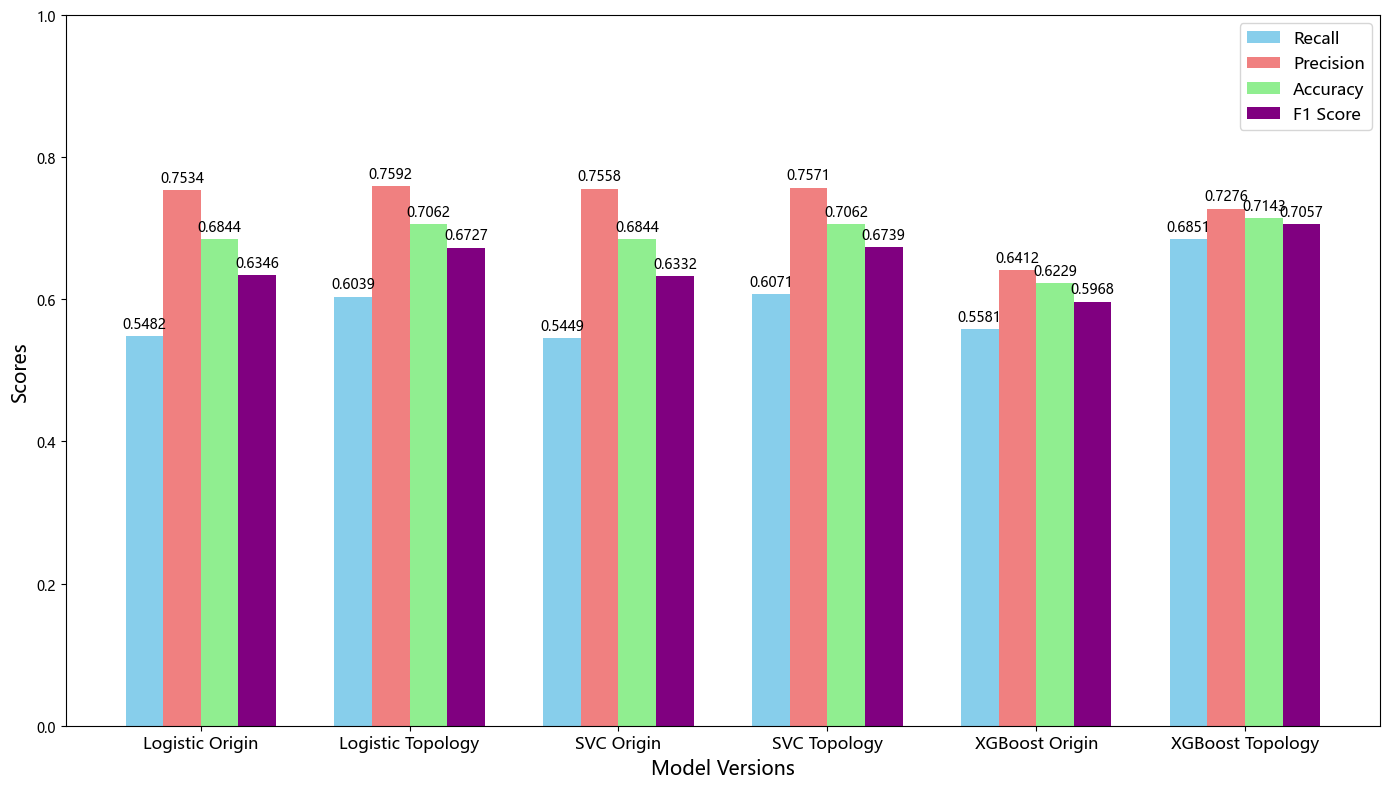

In [38]:
# Data for plotting
labels = ['Logistic Origin', 'Logistic Topology', 'SVC Origin', 'SVC Topology', 'XGBoost Origin', 'XGBoost Topology']
recall = [fd_recall, tp_recall, fd_recall_svc, tp_recall_svc, fd_recall_xgb, tp_recall_xgb]
precision = [fd_precision, tp_precision, fd_precision_svc, tp_precision_svc, fd_precision_xgb, tp_precision_xgb]
acc = [fd_acc, tp_acc, fd_acc_svc, tp_acc_svc, fd_acc_xgb, tp_acc_xgb]
f1 = [fd_f1, tp_f1, fd_f1_svc, tp_f1_svc, fd_f1_xgb, tp_f1_xgb]

x = np.arange(len(labels))  # the label locations
width = 0.18  # Adjusted width to fit 4 groups of bars within each category

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - 1.5 * width, recall, width, label='Recall', color='skyblue')
bars2 = ax.bar(x - 0.5 * width, precision, width, label='Precision', color='lightcoral')
bars3 = ax.bar(x + 0.5 * width, acc, width, label='Accuracy', color='lightgreen')
bars4 = ax.bar(x + 1.5 * width, f1, width, label='F1 Score', color='purple')

# Add labels on top of each bar
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add title and labels
# ax.set_title('Recall, Precision, F1 Scores, Accuracy Comparison for Logistic and SVC Models', fontsize=16)
ax.set_xlabel('Model Versions', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylim(0, 1)  # Ensure the y-axis starts at 0 and ends at 1
ax.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
f1_logistic = [poo_f1, p0_f1, p1_f1, moo_f1, m0_f1, m1_f1, coo_f1, c0_f1, c1_f1, c2_f1, fd_f1]
f1_svc = [poo_f1_svc, p0_f1_svc, p1_f1_svc, moo_f1_svc, m0_f1_svc, m1_f1_svc, coo_f1_svc, c0_f1_svc, c1_f1_svc, c2_f1_svc, fd_f1_svc]
f1_xgb = [poo_f1_xgb, p0_f1_xgb, p1_f1_xgb, moo_f1_xgb, m0_f1_xgb, m1_f1_xgb, coo_f1_xgb, c0_f1_xgb, c1_f1_xgb, c2_f1_xgb, fd_f1_xgb]
names = ['行人離群、覆蓋', '行人0', '行人1', \
    '機車自行車離群、覆蓋', '行人自行車0', '行人自行車1', \
        '汽車離群、覆蓋', '汽車0', '汽車1', '汽車2', '整筆資料']

data_volumes = [np.sum(poo_mtrx), np.sum(p0_mtrx), np.sum(p1_mtrx), np.sum(moo_mtrx), np.sum(m0_mtrx), np.sum(m1_mtrx), np.sum(coo_mtrx), np.sum(c0_mtrx), np.sum(c1_mtrx), np.sum(c2_mtrx), np.sum(fd_mtrx)]

x = np.arange(len(names))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width, f1_logistic, width, label='Logistic', color='skyblue')
bars2 = ax.bar(x, f1_svc, width, label='SVC', color='lightcoral')
bars3 = ax.bar(x + width, f1_xgb, width, label='XGBoost', color='lightgreen')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for i in range(len(names)):
    height1 = bars1[i].get_height()
    height2 = bars2[i].get_height()
    height3 = bars3[i].get_height()
    max_height = max(height1, height2, height3)
    ax.annotate(f'N={data_volumes[i]}',
                xy=(bars1[i].get_x() + bars1[i].get_width(), max_height),
                xytext=(0, 10),  # 10 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

# ax.set_title('Ligistic、SVC f1 score', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Recall', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.set_ylim(0, 1)
ax.legend()

plt.xticks(rotation=15)

plt.show()